<a href="https://colab.research.google.com/github/shionguha/inf2178-expdesignfordatascience-w23/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#logistic regression example 1
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [2]:
print("Predictors: ", cancer1.feature_names)

Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
print("\nResponse: ", cancer1.target_names)


Response:  ['malignant' 'benign']


In [4]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')

cancer.shape

(569, 30)

In [5]:
# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target

In [6]:
# Take a look at the DataFrame again to double check we added the column properly
cancer.shape

(569, 31)

In [7]:
from sklearn.model_selection import train_test_split

# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:10]

# Select the response column 
y = cancer.Target

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)

In [8]:
#building the model with statsmodels


import statsmodels.formula.api as smf
import pandas as pd

# Create the formula string 
all_columns = ' + '.join(cancer.columns[:10])
formula = "Target ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
## Formula:  Target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension

trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  Target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension 

Optimization terminated successfully.
         Current function value: 0.131593
         Iterations 11


In [9]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  426
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           10
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.8004
Time:                        16:19:46   Log-Likelihood:                -56.059
converged:                       True   LL-Null:                       -280.92
Covariance Type:            nonrobust   LLR p-value:                 2.402e-90
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17.1132     15.041      1.138      0.255     -12.368      46.594
mean_radius               -0.1786      4.151     -0.043      0.966      -8.315       7.958
mean_texture              -0.4333      0.079     -5.479      0.000      -0.588      -0.278
mean_perimeter             0.2724      0.569      0.479      0.632      -0.842       1.387
mean_area                 -0.0301      0.019     -1.617      0.106      -0.067       0.006
mean_smoothness          -90.0668     38.119     -2.363      0.018    -164.778     -15.356
mean_compactness          -9.5962     23.305     -0.412      0.681     -55.273      36.080
mean_concavity           -11.5117      9.451     -1.218      0.223     -30.035       7.011
mean_concave_points      -47.8953     32.398     -1.478      0.139    -111.394      15.603
mean_symmetry            -23.1823     12.730     -1.821      0.069     -48.133       1.768
mean_fractal_dimension    91.5592     98.116      0.933      0.351    -100.745     283.863
==========================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [11]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.958041958041958


In [12]:
# Confusion matrix
## 
## Test accuracy =  0.958041958041958

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[49  5]
 [ 1 88]]


In [13]:
#example focusing on odds ratio
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

dat = sns.load_dataset("titanic")
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
reg = smf.logit('survived ~ sex', data=dat).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.2266
Time:                        16:19:48   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
sex[T.male]    -2.5137    

In [15]:
#odds ratio
#
dat['sex_releveled'] = pd.Series(pd.Categorical(dat.sex, categories=["male", "female"]))
reg = smf.logit('survived ~ sex_releveled', data=dat).fit()
np.exp(reg.params)

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


Intercept                   0.232906
sex_releveled[T.female]    12.350663
dtype: float64

In [16]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.189083,0.286886,0.232906
sex_releveled[T.female],8.899955,17.139285,12.350663


In [17]:
reg = smf.logit('survived ~ age', data=dat).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                0.004445
Time:                        16:19:48   Log-Likelihood:                -480.11
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                   0.03839
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0567      0.174     -0.327      0.744      -0.397       0.283
age           -0.0110      0.

In [18]:
reg = smf.logit('survived ~ age + sex', data=dat).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.525180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.2225
Time:                        16:19:48   Log-Likelihood:                -374.98
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.565e-47
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2773      0.230      5.549      0.000       0.826       1.728
sex[T.male]    -2.4659    

In [19]:
reg = smf.logit('survived ~ age + sex_releveled + fare + embark_town', data=dat).fit()
print(reg.summary())
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Optimization terminated successfully.
         Current function value: 0.494701
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.2669
Time:                        16:19:48   Log-Likelihood:                -352.23
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 2.270e-53
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.7209      0.322     -2.237      0.025      

,Lower CI,Upper CI,OR
Intercept,0.258580,0.914547,0.486296
sex_releveled[T.female],7.362150,15.733812,10.762652
embark_town[T.Queenstown],0.085568,0.708630,0.246244
embark_town[T.Southampton],0.301042,0.803781,0.491906
age,0.975657,1.001370,0.988430
fare,1.005355,1.015948,1.010638


In [20]:
#prediction interval example with titanic data
# find the dataset here: https://www.kaggle.com/c/titanic/data
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#Import the data set

titanic_data = pd.read_csv('titanic_train.csv')

#Exploratory data analysis

sns.heatmap(titanic_data.isnull(), cbar=False)

sns.countplot(x='Survived', data=titanic_data)

sns.countplot(x='Survived', hue='Sex', data=titanic_data)

sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

plt.hist(titanic_data['Age'].dropna())

plt.hist(titanic_data['Fare'])

sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

#Imputation function

def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

#Impute the missing Age data

titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

#Reinvestigate missing data

sns.heatmap(titanic_data.isnull(), cbar=False)

#Drop null data

titanic_data.drop('Cabin', axis=1, inplace = True)

titanic_data.dropna(inplace = True)

#Create dummy variables for Sex and Embarked columns

sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

#Add dummy variables to the DataFrame and drop non-numeric data

titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

#Print the finalized data set

titanic_data.head()

#Split the data set into x and y data

y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#Create the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Calculate performance metrics

from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))

#Generate a confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

FileNotFoundError: ignored

In [23]:
#more sophisticated example of prediction intervals with diabetes data
import numpy as np
np.set_printoptions(
    formatter={'float': lambda x: "{:.4f}".format(x)}
)
import pandas as pd
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
diabetes = load_diabetes(as_frame=True)
df = diabetes['data']
df['target'] = diabetes['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [25]:
train, test = train_test_split(df, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'), df['target'], test_size=0.1, 
    random_state=42
)
x_train = X_train['bmi']
x_test = X_test['bmi']
print(f"X_train shape: {X_train.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(train[['target']].describe().T)
print(f"X_test shape: {X_test.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
test[['target']].describe().T

X_train shape: (397, 10)
x_train shape: (397,)
y_train shape: (397,)

========== Training data ==========


,count,mean,std,min,25%,50%,75%,max
target,397.0000,152.0101,76.9640,25.0000,86.0000,141.0000,209.0000,346.0000


X_test shape: (45, 10)
x_test shape: (45,)
y_test shape: (45,)

========== Test data ==========


,count,mean,std,min,25%,50%,75%,max
target,45.0000,153.2222,79.0943,42.0000,90.0000,129.0000,230.0000,310.0000


In [27]:
#easy example of prediction interval with linear regression
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(model.predict(x_test.values.reshape(-1, 1))[:5])

Intercept: 152.10
Slope: 955.63
[146.1674 187.3669 148.2274 201.7867 132.7776]


In [28]:
#more detailed example of prediction interval
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.api import formula as smf
import pandas as pd
import numpy as np

n = 100
a = 20
b = 9
s = 2

df = pd.DataFrame({'temperature': np.linspace(0, 110, n), 'sales':a + b*np.linspace(0, 1, n) + norm(0, s).rvs(n)})


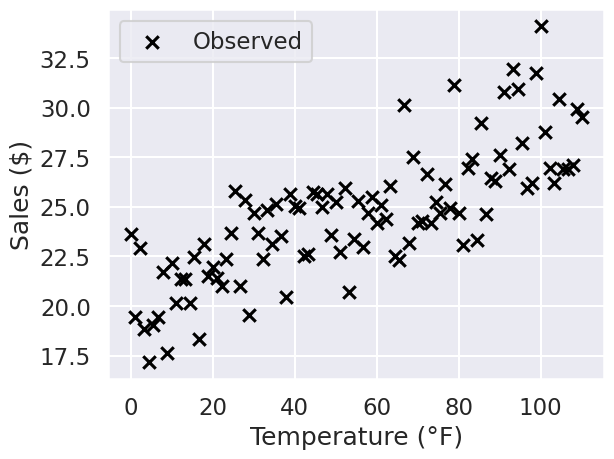

In [29]:
plt.scatter(df['temperature'], df['sales'], label='Observed', marker='x', color='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


In [30]:
model = smf.ols('sales ~ temperature', df)
results = model.fit()

alpha = .05

predictions = results.get_prediction(df).summary_frame(alpha)


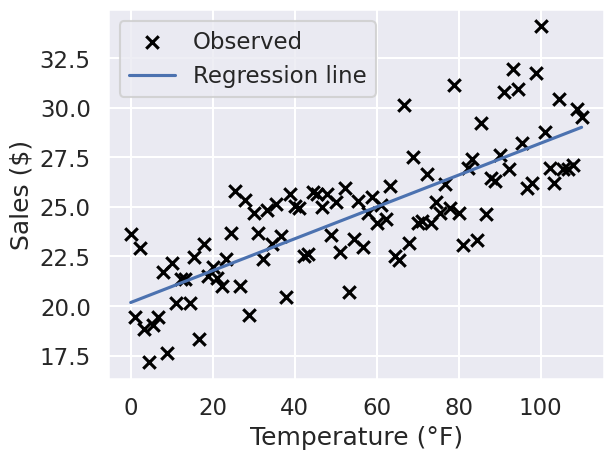

In [31]:
plt.scatter(df['temperature'], df['sales'], label='Observed', marker='x', color='black')
plt.plot(df['temperature'], predictions['mean'], label='Regression line')
plt.xlabel('Temperature (°F)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


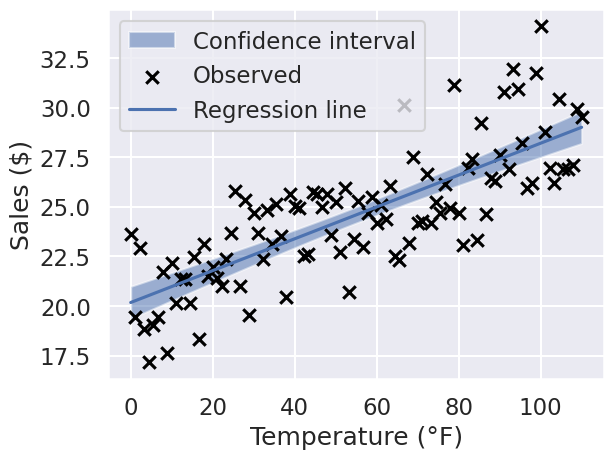

In [32]:
plt.fill_between(df['temperature'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval')
plt.scatter(df['temperature'], df['sales'], label='Observed', marker='x', color='black')
plt.plot(df['temperature'], predictions['mean'], label='Regression line')
plt.xlabel('Temperature (°F)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


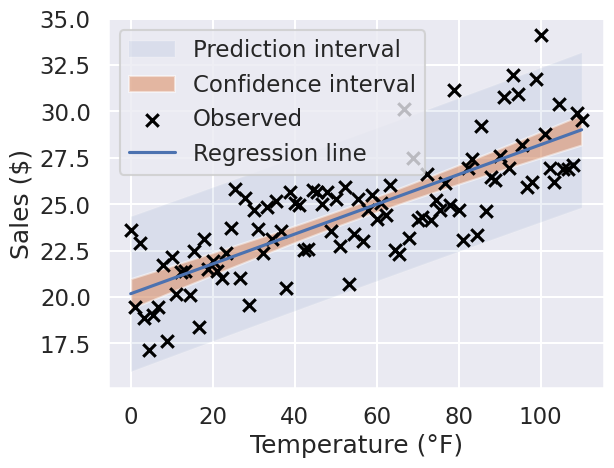

In [33]:
plt.fill_between(df['temperature'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], alpha=.1, label='Prediction interval')
plt.fill_between(df['temperature'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval')
plt.scatter(df['temperature'], df['sales'], label='Observed', marker='x', color='black')
plt.plot(df['temperature'], predictions['mean'], label='Regression line')
plt.xlabel('Temperature (°F)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


In [34]:
pi_covers_observed = (predictions['obs_ci_upper'] > df['sales']) & (predictions['obs_ci_lower'] < df['sales'])

print('Coverage proportion: {0}'.format(np.mean(pi_covers_observed)))


Coverage proportion: 0.96
